In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_d18o = pd.read_json('../../data/d18o_cleaned_data.json')
df_sss = pd.read_json('../../sss_cleaned_data.json')
df_predict = pd.read_json('coords_to_predict.json')

In [3]:
df_sss_filtered = pd.DataFrame(columns=['lon','lat'])
df_sss_filtered['lon'] = df_sss['lon_norm']
df_sss_filtered['lat'] = df_sss['lat_norm']
x = df_sss_filtered.values
y = df_sss['sss_norm'].values


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
y_train = np.reshape(y_train,(len(y_train),1))
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)

In [4]:
pred_data = torch.FloatTensor(df_predict.values)

In [5]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear1 = torch.nn.Linear(in_features=2,out_features=1500)
        self.activation1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(in_features=1500,out_features=1000)
        self.activation2 = torch.nn.ReLU()
        self.linear3 = torch.nn.Linear(in_features=1000,out_features=1000)
        self.output = torch.nn.Linear(1000, 1)

        
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        x = self.output(x)
        return x
    
net = Net()
net

Net(
  (linear1): Linear(in_features=2, out_features=1500, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=1500, out_features=1000, bias=True)
  (activation2): ReLU()
  (linear3): Linear(in_features=1000, out_features=1000, bias=True)
  (output): Linear(in_features=1000, out_features=1, bias=True)
)

In [6]:
torch.nn.init.normal_(net.linear1.weight,mean=0,std=0.5)
torch.nn.init.normal_(net.linear2.weight,mean=0,std=0.5)
torch.nn.init.normal_(net.linear3.weight,mean=0,std=0.5)

Parameter containing:
tensor([[-5.3383e-01, -4.1256e-01, -1.0916e+00,  ...,  1.0913e-01,
          5.1509e-01,  6.3188e-01],
        [ 4.4859e-01, -5.0235e-01,  2.4094e-01,  ..., -5.5052e-01,
          3.0096e-02, -2.0851e-01],
        [ 6.8078e-01, -2.0041e-01, -7.0793e-04,  ..., -1.3809e-01,
         -1.3491e-01,  5.5698e-01],
        ...,
        [-3.3935e-01, -5.0110e-01, -1.5873e-01,  ..., -1.7893e-01,
         -3.5283e-01,  9.8338e-02],
        [ 8.6419e-01,  4.1007e-01,  1.4909e-01,  ...,  3.3178e-01,
          4.8500e-01,  7.2334e-01],
        [-5.7918e-01, -2.1683e-01, -1.8420e-01,  ..., -4.0862e-01,
         -3.7066e-01, -1.5349e-01]], requires_grad=True)

In [7]:
criterion = nn.L1Loss()
optimizer_adagrad = optim.Adagrad(net.parameters())

In [8]:
epochs =5001
loss_arr = []

for i in range(epochs):  # loop over the dataset multiple times
    y_hat = net.forward(x_train)
    loss = criterion(y_hat,y_train)
    loss_arr.append(loss)
    
    if i%10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
        
    # forward + backward + optimize
    optimizer_adagrad.zero_grad()
    loss.backward()
    optimizer_adagrad.step()


Epoch: 0 Loss: 3.8101911544799805
Epoch: 10 Loss: 7.056612014770508
Epoch: 20 Loss: 4.468465328216553
Epoch: 30 Loss: 3.2099812030792236
Epoch: 40 Loss: 2.483617067337036
Epoch: 50 Loss: 1.9939358234405518
Epoch: 60 Loss: 1.6464776992797852
Epoch: 70 Loss: 1.378843903541565
Epoch: 80 Loss: 1.1643565893173218
Epoch: 90 Loss: 1.0047372579574585
Epoch: 100 Loss: 0.9163108468055725
Epoch: 110 Loss: 0.8405101299285889
Epoch: 120 Loss: 0.779082715511322
Epoch: 130 Loss: 0.7278066873550415
Epoch: 140 Loss: 0.6827800869941711
Epoch: 150 Loss: 0.6434639096260071
Epoch: 160 Loss: 0.6078930497169495
Epoch: 170 Loss: 0.5759990811347961
Epoch: 180 Loss: 0.5442934632301331
Epoch: 190 Loss: 0.5144650936126709
Epoch: 200 Loss: 0.4879107177257538
Epoch: 210 Loss: 0.4631847143173218
Epoch: 220 Loss: 0.43997108936309814
Epoch: 230 Loss: 0.4192768633365631
Epoch: 240 Loss: 0.3995926082134247
Epoch: 250 Loss: 0.38117679953575134
Epoch: 260 Loss: 0.3650522232055664
Epoch: 270 Loss: 0.3498615622520447
Epoch:

Epoch: 2200 Loss: 0.051670778542757034
Epoch: 2210 Loss: 0.05141732469201088
Epoch: 2220 Loss: 0.05133795365691185
Epoch: 2230 Loss: 0.05120578408241272
Epoch: 2240 Loss: 0.05091528967022896
Epoch: 2250 Loss: 0.050828248262405396
Epoch: 2260 Loss: 0.05061787739396095
Epoch: 2270 Loss: 0.05044744908809662
Epoch: 2280 Loss: 0.05046099051833153
Epoch: 2290 Loss: 0.05017808824777603
Epoch: 2300 Loss: 0.050020430237054825
Epoch: 2310 Loss: 0.049770720303058624
Epoch: 2320 Loss: 0.049756888300180435
Epoch: 2330 Loss: 0.049473054707050323
Epoch: 2340 Loss: 0.04944181069731712
Epoch: 2350 Loss: 0.049178484827280045
Epoch: 2360 Loss: 0.04904630407691002
Epoch: 2370 Loss: 0.0490710586309433
Epoch: 2380 Loss: 0.04880838096141815
Epoch: 2390 Loss: 0.04870223626494408
Epoch: 2400 Loss: 0.048610150814056396
Epoch: 2410 Loss: 0.04855005443096161
Epoch: 2420 Loss: 0.04845708608627319
Epoch: 2430 Loss: 0.048320457339286804
Epoch: 2440 Loss: 0.048251282423734665
Epoch: 2450 Loss: 0.0480310320854187
Epoc

Epoch: 4350 Loss: 0.033144328743219376
Epoch: 4360 Loss: 0.035851605236530304
Epoch: 4370 Loss: 0.03313272446393967
Epoch: 4380 Loss: 0.035803914070129395
Epoch: 4390 Loss: 0.03306197747588158
Epoch: 4400 Loss: 0.03570132702589035
Epoch: 4410 Loss: 0.03300635889172554
Epoch: 4420 Loss: 0.03566665202379227
Epoch: 4430 Loss: 0.032926272600889206
Epoch: 4440 Loss: 0.03576234355568886
Epoch: 4450 Loss: 0.03305089846253395
Epoch: 4460 Loss: 0.03550880029797554
Epoch: 4470 Loss: 0.032998815178871155
Epoch: 4480 Loss: 0.03547487035393715
Epoch: 4490 Loss: 0.03297216072678566
Epoch: 4500 Loss: 0.03542651981115341
Epoch: 4510 Loss: 0.03287031129002571
Epoch: 4520 Loss: 0.03532899171113968
Epoch: 4530 Loss: 0.032917656004428864
Epoch: 4540 Loss: 0.03518654778599739
Epoch: 4550 Loss: 0.03287569433450699
Epoch: 4560 Loss: 0.03525853157043457
Epoch: 4570 Loss: 0.032772477716207504
Epoch: 4580 Loss: 0.03528333455324173
Epoch: 4590 Loss: 0.032791804522275925
Epoch: 4600 Loss: 0.03518793731927872
Epoc

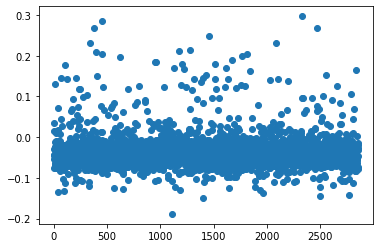

In [9]:
## prediction of test set
test_pred = []
with torch.no_grad():
    for val in x_test:
        y_hat = net.forward(val)
        test_pred.append(y_hat.item())

diff = np.array(test_pred)- y_test
plt.plot(diff,marker='o',linestyle='')

In [10]:
#prediction of world map
preds = []
with torch.no_grad():
    for val in pred_data:
        y_hat = net.forward(val)
        preds.append(y_hat.item())

(array([  563.,  2502.,  4350.,  4006.,  5783., 19032., 17197.,  8673.,
         2011.,   683.]),
 array([25.59204903, 26.82424267, 28.05643631, 29.28862995, 30.52082359,
        31.75301723, 32.98521088, 34.21740452, 35.44959816, 36.6817918 ,
        37.91398544]),
 <a list of 10 Patch objects>)

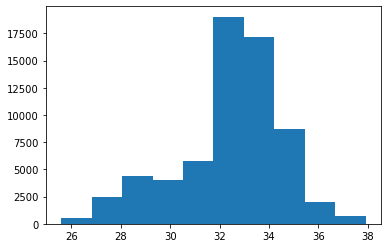

In [11]:
pred_arr = np.asarray(preds)*max(abs(df_sss['sss']))
plt.hist(pred_arr)

In [12]:
df_out = pd.DataFrame(columns=['lon','lat','sss'])
pred_arr_out = list(pred_arr)
df_predict['sss'] = pred_arr_out
df_predict.to_json('sss_interpolated.json')